###Prepared by: Michael Akinosho
###Date: November 13th, 2021

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
#Mounting Google Drive
#Added the error handling when running Colab notebook locally
#google.colab can not be installed locally
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass
else:
    pass

In [56]:
filename = 'file:///C:/Users/micha/Documents/GitHub/codingdojo/data-science-assignments/06%20-%20Decision%20Trees%20Random%20Forests/Boston_Housing_from_Sklearn.csv'

In [57]:
df = pd.read_csv(filename,header=0)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [58]:
df.corr()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
CRIM,1.000000,0.420972,-0.219247,0.352734,0.289946,0.455621,-0.388305
NOX,0.420972,1.000000,-0.302188,0.731470,0.188933,0.590879,-0.427321
RM,-0.219247,-0.302188,1.000000,-0.240265,-0.355501,-0.613808,0.695360
AGE,0.352734,0.731470,-0.240265,1.000000,0.261515,0.602339,-0.376955
PTRATIO,0.289946,0.188933,-0.355501,0.261515,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.590879,-0.613808,0.602339,0.374044,1.000000,-0.737663
PRICE,-0.388305,-0.427321,0.695360,-0.376955,-0.507787,-0.737663,1.000000


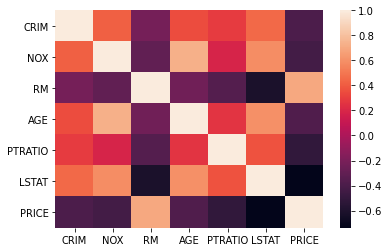

In [59]:
sns_heatmap = sns.heatmap(df.corr())

In [60]:
#Creating the dataframes for X and y
#Keeping the following features for X: RM, PTRATIO, LSTAT
y = df['PRICE']
X = df.drop(columns=['PRICE','CRIM','NOX','AGE'])

In [61]:
#Creating the Train Test Split
#Appears the random state of 42 is causing over-fitting
#Leaving this value based on instructions
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Start of Bagged Tress Section

In [62]:
#Instantiate Bagging Regressor model
bagreg = BaggingRegressor(random_state = 42)

In [63]:
#Fitting the dataframe over the Bagging Regressor model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [64]:
bagreg.predict(X_test)

array([22.52, 31.02, 18.14, 23.9 , 15.36, 21.42, 20.42, 13.29, 21.32,
       21.63, 21.8 , 17.69, 11.62, 21.42, 17.49, 27.76, 20.98,  8.85,
       48.46, 15.96, 23.33, 23.29, 12.59, 23.6 , 14.82, 14.69, 29.52,
       15.85, 19.39, 20.68, 19.87, 22.83, 29.45, 20.41, 11.5 , 17.66,
       34.56, 29.42, 18.27, 23.53, 17.87, 28.08, 48.46, 23.51, 25.32,
       13.98, 16.03, 23.04, 15.34, 29.22, 22.56, 35.91, 18.86, 25.95,
       42.  , 21.44, 14.73, 30.04, 24.33, 19.85, 26.81, 35.22, 28.25,
       19.51, 25.13, 19.62, 15.4 , 23.07, 25.96, 22.38, 20.36, 26.12,
       10.13, 21.79, 21.26,  8.03, 21.54, 49.54, 12.94, 11.96, 23.58,
        8.34, 30.13,  8.84, 20.45, 26.37, 13.47, 23.45, 23.35, 16.84,
       22.15,  7.9 , 19.79, 20.92, 38.25, 19.51, 21.94, 10.19, 15.27,
       13.31, 19.51, 25.61, 12.  , 26.44, 18.96, 11.67, 19.35, 26.02,
       18.18, 23.25,  6.16, 13.  , 22.34, 21.98, 34.87, 14.49, 42.32,
       15.6 , 17.75, 24.05, 23.55, 24.45,  9.17, 20.82, 23.22, 19.44,
       24.36])

In [65]:
[estimator.get_depth() for estimator in bagreg.estimators_]

[16, 17, 19, 17, 16, 17, 19, 20, 15, 16]

In [66]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('Bagged trees train score is: {}'.format(bagreg_train_score))
print('Bagged trees test score is: {}'.format(bagreg_test_score))

Bagged trees train score is: 0.9589474812896627
Bagged trees test score is: 0.6810228787398808


# Start of Random Forest Regression Section

In [67]:
rf = RandomForestRegressor(random_state = 42)

In [69]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
rf.predict(X_test)

array([22.219, 31.851, 17.69 , 24.189, 14.647, 20.756, 19.719, 12.907,
       21.452, 21.719, 19.915, 19.218, 12.467, 21.029, 17.591, 25.501,
       20.927,  8.507, 47.621, 15.667, 23.822, 23.375, 12.003, 22.383,
       14.924, 15.505, 30.201, 15.621, 20.092, 20.822, 18.988, 23.251,
       27.037, 20.978, 11.55 , 17.275, 35.818, 22.98 , 19.644, 23.389,
       18.256, 28.057, 46.257, 23.27 , 24.541, 15.265, 16.068, 23.248,
       14.938, 29.483, 23.002, 35.318, 18.85 , 26.457, 44.175, 20.827,
       14.759, 32.364, 22.971, 20.536, 26.187, 34.437, 30.741, 19.252,
       27.195, 18.911, 15.161, 23.3  , 26.385, 20.66 , 21.089, 26.597,
       10.559, 23.233, 21.56 ,  7.754, 20.829, 48.825, 12.774, 11.453,
       23.502,  8.045, 30.079,  8.865, 21.233, 26.43 , 14.145, 23.257,
       23.57 , 17.255, 21.463,  7.923, 19.149, 20.948, 28.907, 19.033,
       23.   , 11.469, 15.128, 12.923, 20.682, 29.342, 11.327, 22.534,
       20.946, 11.626, 17.924, 25.366, 20.643, 23.57 ,  7.108, 13.181,
      

In [71]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Random forest regression train score is: {}'.format(rf_train_score))
print('Random forest regression test score is: {}'.format(rf_test_score))

Random forest regression train score is: 0.9728543493496158
Random forest regression test score is: 0.7185553579730205


##Random forest regression appears to be producing better performance than bagged trees.
##Regression trees appears to produce better performance once the depth with the best r2 score is known, it may not be practical for cases with a lot of depth.